In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

data= fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554

In [2]:
nameMap = {'0':'Zero',
           '1':'One',
           '2':'Two',
           '3':'Three',
           '4':'Four',
           '5':'Five',
           '6':'Six',
           '7':'Seven',
           '8':'Eight',
           '9':'Nine'
          }
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
dfData['target'] = dfData['target'].map(nameMap)
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [3]:
y_train.head()

56167    Seven
8496     Eight
22352     Zero
63857     Nine
13907    Seven
Name: target, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

y_train_transf = le.transform(y_train)

In [5]:
y_train_transf[:5]

array([5, 0, 9, 3, 5])

/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


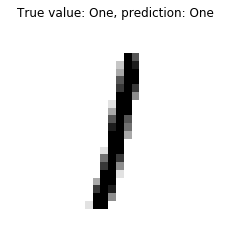

In [6]:
logReg_clf = LogisticRegression()
logReg_clf.fit(X_train, y_train_transf)

y_test_pred = logReg_clf.predict(X_test)
plt.imshow(X_test.astype(int).values[0].reshape(28,28),cmap=plt.get_cmap('gray_r'))
plt.title(f'True value: {y_test.values[0]}, prediction: {le.inverse_transform(y_test_pred[0].reshape(-1,1))[0]}')
plt.axis('off')
plt.show()

In [13]:
le.inverse_transform(y_test_pred[0].reshape(-1,1))

array(['One'], dtype=object)

In [8]:
y_test[:3]

55411    One
56965    One
1414     Six
Name: target, dtype: object

In [9]:
le.classes_

array(['Eight', 'Five', 'Four', 'Nine', 'One', 'Seven', 'Six', 'Three',
       'Two', 'Zero'], dtype=object)

In [12]:
y_test_pred[0],y_test_pred[:3]

(4, array([4, 4, 6]))